In [20]:
import pandas as pd
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt

def get_id(path):
    return Path(path).with_suffix('').name.replace('11ph11','/')



In [21]:
data1_path = '/home/jcejudo/projects/duplicate_detection/data/90402_M_NL_Rijksmuseum.csv'
data2_path = '/home/jcejudo/projects/duplicate_detection/data/09102_Ag_EU_MIMO.csv'

path = '/home/jcejudo/projects/duplicate_detection/results/90402_M_NL_Rijksmuseum/similarity.csv'

df = pd.read_csv(path)
df = df.sort_values(by=['distance'],ascending=False)
print(df.shape[0])
df = df.iloc[::2]
print(df.shape[0])

data1_df = pd.read_csv(data1_path)
data1_df = data1_df[['europeana_id','uri','image_url']]
data1_df['dataset_name'] = [Path(data1_path).with_suffix('').name for i in range(data1_df.shape[0])]

data2_df = pd.read_csv(data2_path)
data2_df = data2_df[['europeana_id','uri','image_url']]
data2_df['dataset_name'] = [Path(data2_path).with_suffix('').name for i in range(data2_df.shape[0])]

df['from'] = df['from'].apply(get_id)
df['to'] = df['to'].apply(get_id)

1108225
554113


In [23]:
data_df = pd.concat([data1_df,data2_df])


df = df.merge(data_df,left_on='from',right_on='europeana_id')
df = df.rename(columns={'from':'id1','image_url':'url1','uri':'uri1','dataset_name':'dataset1'})
df.pop('europeana_id')

df = df.merge(data_df,left_on='to',right_on='europeana_id')
df = df.rename(columns={'to':'id2','image_url':'url2','uri':'uri2','dataset_name':'dataset2'})
df.pop('europeana_id')

0                  /09102/_CM_0875626
1                  /09102/_CM_0875626
2                  /09102/_CM_0875626
3                  /09102/_CM_0875626
4                  /09102/_CM_0875626
                     ...             
554108              /90402/HA_0011670
554109            /90402/RP_P_1975_33
554110    /90402/RP_F_2001_7_1122E_36
554111           /09102/_SMS_MM_M1455
554112    /90402/RP_T_1918_129A_37_V_
Name: europeana_id, Length: 554113, dtype: object

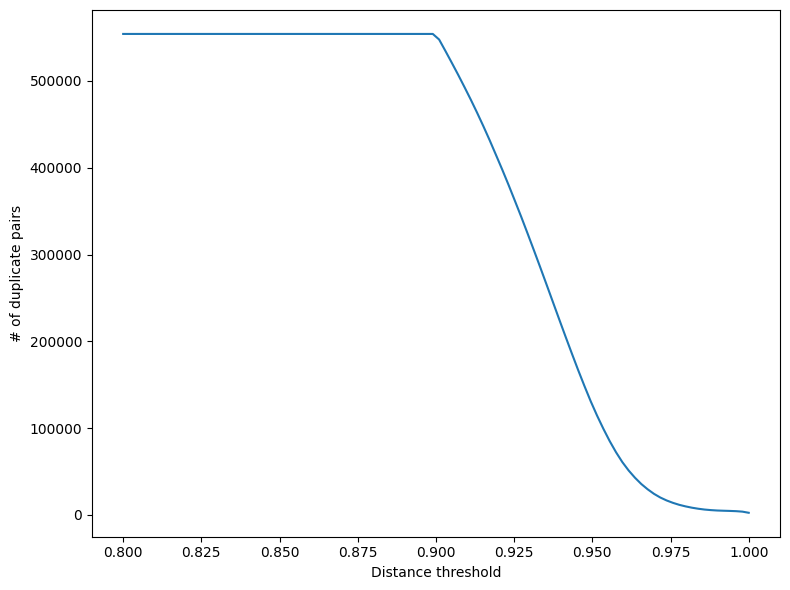

In [24]:
threshold_list = np.linspace(0.8, 1.0, num=100)
n_pairs_list = []
for threshold in threshold_list:
    _df = df.loc[df['distance'] >= threshold]
    n_pairs = _df.shape[0]
    n_pairs_list.append(n_pairs)
        
fix,ax = plt.subplots(figsize = (8,6))
ax.plot(threshold_list,n_pairs_list)
ax.set_ylabel('# of duplicate pairs')
ax.set_xlabel('Distance threshold')
plt.tight_layout()
plt.show()

In [37]:
threshold = 0.975

similarity_df = df.loc[df['distance'] >= threshold]
similarity_df = similarity_df.sort_values(by=['distance'],ascending=False)
print(similarity_df.shape)

(14962, 9)


In [39]:
saving_path = '/home/jcejudo/projects/duplicate_detection/results/90402_M_NL_Rijksmuseum/duplicates.csv'
similarity_df.to_csv(saving_path,index = False)

In [33]:
similarity_df.head()

,id1,id2,distance,uri1,url1,dataset1,uri2,url2,dataset2
0,/09102/_CM_0875696,/09102/_CM_0875626,1.0,http://data.europeana.eu/item/09102/_CM_0875696,http://www.mimo-international.com/media/MF-ISS...,09102_Ag_EU_MIMO,http://data.europeana.eu/item/09102/_CM_0875626,http://www.mimo-international.com/media/MF-ISS...,09102_Ag_EU_MIMO
3132,/90402/BK_KOG_1723_2,/90402/BK_KOG_1723,1.0,http://data.europeana.eu/item/90402/BK_KOG_1723_2,https://lh3.googleusercontent.com/VEfASsiOcCEt...,90402_M_NL_Rijksmuseum,http://data.europeana.eu/item/90402/BK_KOG_1723,https://lh3.googleusercontent.com/qrfd0FgpKcAo...,90402_M_NL_Rijksmuseum
3122,/90402/BK_KOG_1723_6,/90402/BK_KOG_1723_3,1.0,http://data.europeana.eu/item/90402/BK_KOG_1723_6,https://lh3.googleusercontent.com/I1dUqyimXmHU...,90402_M_NL_Rijksmuseum,http://data.europeana.eu/item/90402/BK_KOG_1723_3,https://lh3.googleusercontent.com/1NojXE1e3eBZ...,90402_M_NL_Rijksmuseum
3123,/90402/BK_KOG_1723_7,/90402/BK_KOG_1723_3,1.0,http://data.europeana.eu/item/90402/BK_KOG_1723_7,https://lh3.googleusercontent.com/gdVnAb4gsVb4...,90402_M_NL_Rijksmuseum,http://data.europeana.eu/item/90402/BK_KOG_1723_3,https://lh3.googleusercontent.com/1NojXE1e3eBZ...,90402_M_NL_Rijksmuseum
3124,/90402/BK_KOG_1723,/90402/BK_KOG_1723_3,1.0,http://data.europeana.eu/item/90402/BK_KOG_1723,https://lh3.googleusercontent.com/qrfd0FgpKcAo...,90402_M_NL_Rijksmuseum,http://data.europeana.eu/item/90402/BK_KOG_1723_3,https://lh3.googleusercontent.com/1NojXE1e3eBZ...,90402_M_NL_Rijksmuseum


In [38]:
similarity_df.loc[similarity_df['dataset1'] != similarity_df['dataset2']]

,id1,id2,distance,uri1,url1,dataset1,uri2,url2,dataset2
3411,/09102/_NL_AsdRM_lido_623421,/90402/BK_NM_5483_1,1.000000,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO,http://data.europeana.eu/item/90402/BK_NM_5483_1,https://lh3.googleusercontent.com/Mog51jA1ps_S...,90402_M_NL_Rijksmuseum
3983,/90402/NG_2010_116_2,/09102/_NL_AsdRM_lido_696512,1.000000,http://data.europeana.eu/item/90402/NG_2010_116_2,https://lh3.googleusercontent.com/Mz8_UV6pe0-n...,90402_M_NL_Rijksmuseum,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO
3984,/90402/NG_2010_116_1,/09102/_NL_AsdRM_lido_696512,1.000000,http://data.europeana.eu/item/90402/NG_2010_116_1,https://lh3.googleusercontent.com/v8o13_TBNcbr...,90402_M_NL_Rijksmuseum,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO
2935,/09102/_NL_AsdRM_lido_623463,/90402/BK_NM_11430_106_1,1.000000,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO,http://data.europeana.eu/item/90402/BK_NM_1143...,https://lh3.googleusercontent.com/NRD3QJgMXIWj...,90402_M_NL_Rijksmuseum
2937,/09102/_NL_AsdRM_lido_623461,/90402/BK_NM_11430_106_1,1.000000,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO,http://data.europeana.eu/item/90402/BK_NM_1143...,https://lh3.googleusercontent.com/NRD3QJgMXIWj...,90402_M_NL_Rijksmuseum
...,...,...,...,...,...,...,...,...,...
39839,/90402/AK_RAK_1989_6,/09102/_NL_AsdRM_lido_2064,0.977207,http://data.europeana.eu/item/90402/AK_RAK_1989_6,https://lh3.ggpht.com/k47s5Z8_oL9Pjai0ammHl-xY...,90402_M_NL_Rijksmuseum,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO
9716,/90402/BK_NM_11430_101,/09102/_NL_AsdRM_lido_351225,0.977108,http://data.europeana.eu/item/90402/BK_NM_1143...,https://lh3.googleusercontent.com/OGLWJ6bP6GwD...,90402_M_NL_Rijksmuseum,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO
15563,/09102/_NL_AsdRM_lido_351472,/90402/BK_KOG_1041_B,0.976313,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO,http://data.europeana.eu/item/90402/BK_KOG_1041_B,https://lh3.googleusercontent.com/gp5hpaaNwdJV...,90402_M_NL_Rijksmuseum
3008,/09102/_NL_AsdRM_lido_491262,/90402/BK_KOG_1347_B_1,0.975963,http://data.europeana.eu/item/09102/_NL_AsdRM_...,http://www.mimo-international.com/media/RIJKS/...,09102_Ag_EU_MIMO,http://data.europeana.eu/item/90402/BK_KOG_134...,https://lh3.googleusercontent.com/YzoVDqvQ7cZ_...,90402_M_NL_Rijksmuseum


In [65]:
# bottleneck

def get_dataset(europeana_id):
    return '09102_Ag_EU_MIMO' if europeana_id in data2_df['europeana_id'].values else '90402_M_NL_Rijksmuseum'

df['dataset_image_1'] = df['from'].apply(get_dataset)
df['dataset_image_2'] = df['to'].apply(get_dataset)

KeyboardInterrupt: 

In [ ]:
data_df = pd.concat([data1_df,data2_df])

similarity_df = similarity_df.merge(data_df,left_on='from',right_on='europeana_id')
similarity_df = similarity_df.rename(columns={'from':'id1','image_url':'url1','uri':'uri1'})
similarity_df.pop('europeana_id')

similarity_df = similarity_df.merge(data_df,left_on='to',right_on='europeana_id')
similarity_df = similarity_df.rename(columns={'to':'id2','image_url':'url2','uri':'uri2'})
similarity_df.pop('europeana_id')

similarity_df = similarity_df.sort_values(by=['distance'],ascending=False)

# _df2 = _df.merge(data2_df,left_on='from',right_on='europeana_id')
# _df2 = _df2.rename(columns={'from':'id1','image_url':'url1','uri':'uri1'})
# _df2.pop('europeana_id')
# _df2 = _df2.merge(data2_df,left_on='to',right_on='europeana_id')
# _df2 = _df2.rename(columns={'to':'id2','image_url':'url2','uri':'uri2'})
# _df2.pop('europeana_id')


print(similarity_df.shape[0])

#_df.pop('distance')


#_df.head(5)